In [109]:
import pandas as pd

In [110]:
hobbygames_data = pd.read_csv("csv/hobbygames.csv", encoding="utf-8", encoding_errors='ignore', on_bad_lines='skip')
gagagames_data = pd.read_csv("csv/gagagames.csv", encoding="utf-8", encoding_errors='ignore', on_bad_lines='skip')
lavkaigr_data = pd.read_csv("csv/lavkaigr.csv", encoding="utf-8", encoding_errors='ignore', on_bad_lines='skip')
merged_links = pd.read_csv("csv/merged_links.csv", encoding="utf-8", encoding_errors='ignore', on_bad_lines='skip')

In [111]:
df_hobby = pd.DataFrame(hobbygames_data)
df_gaga = pd.DataFrame(gagagames_data)
df_lavka = pd.DataFrame(lavkaigr_data)
df_links=pd.DataFrame(merged_links)

In [112]:
merged_hg_links=pd.DataFrame(pd.merge(df_links,df_hobby, on="Url_game_hg"))[
    pd.notnull(pd.DataFrame(pd.merge(df_links, df_hobby, on="Url_game_hg"))['Url_game_hg'])]
merge_data_hg_li_links=pd.DataFrame(pd.merge(merged_hg_links,df_lavka, on="Url_game_lavka"))[
    pd.notnull(pd.DataFrame(pd.merge(merged_hg_links, df_lavka, on="Url_game_lavka"))['Url_game_lavka'])]
merge_data = pd.DataFrame(pd.merge(merge_data_hg_li_links,df_gaga, on="Name_ga"))[
    pd.notnull(pd.DataFrame(pd.merge(df_gaga,merge_data_hg_li_links,  on="Name_ga"))['Name_ga'])]

merge_data=merge_data.drop_duplicates(['Url_game_hg'])
merge_data=merge_data.drop_duplicates(['Url_game_lavka'])
merge_data


,Name_ga,Url_game_hg,Url_game_lavka,Name_HG,Image_HG,Slogan,Tags,Price,Player,Time,...,Rating_tesera,Transliterated_name_y,Image_gaga,Plus,Feature,Minus,Resume,Rules,Url_game_gaga,Transliterated_name
0,Большая Бродилка,https://hobbygames.ru/bolshaja-brodilka,https://www.lavkaigr.ru/shop/family/bolshaya-b...,Большая бродилка,https://hobbygames.ru/image/cache/hobbygames_b...,"Вперёд, к сокровищам злобного джинна!",Семейные игры,1 890,2-5,30+,...,5.50,Bol'shaja brodilka,https://gaga.ru/gaga/files/images/fullsize/303...,NaN,NaN,NaN,"Ничто не вызывает больше эмоций, чем неудачный...",https://gaga.ru//gaga/files/pdf/rules/ru/3037-...,https://gaga.ru/game/bolshaya-brodilka/,Bol'shaja Brodilka
2,7 Чудес. Новый дизайн,https://hobbygames.ru/7-chudes,https://www.lavkaigr.ru/shop/ekonomicheskie/7-...,7 чудес,https://hobbygames.ru/image/cache/hobbygames_b...,Дневные и ночные стороны,"7 Чудес,Игры для компании,Карточные игры,Семей...",3 490,3-7,30+,...,NaN,7 chudes,https://gaga.ru/gaga/files/images/fullsize/543...,NaN,NaN,NaN,Настольная игра 7 Чудес — очередная веха в эво...,https://gaga.ru//gaga/files/pdf/rules/ru/5436.pdf,https://gaga.ru/game/7-chudes/,7 Chudes. Novyj dizajn
4,Тик Так Бумм!,https://hobbygames.ru/tik-tak-bumm,https://www.lavkaigr.ru/shop/kartochnye/tik-ta...,Тик...Так Бумм,https://hobbygames.ru/image/cache/hobbygames_b...,"Тик-так, тик-так","Вечериночные игры,Игры для компании,Интерактив...",2 490,2-12,30+,...,5.60,Tik Tak Bumm,https://gaga.ru/gaga/files/images/fullsize/187...,знакома с детства^правила понятны в любом возр...,"уникальная бомба-таймер, которая всегда взрыва...",неумолимый таймер не дает поспорить^,Настольная игра Тик Так Бумм! не зря входит в ...,https://gaga.ru//gaga/files/pdf/rules/ru/187-3...,https://gaga.ru/game/tick-tack-bumm/,Tik Tak Bumm!
5,Замес,https://hobbygames.ru/zames,https://www.lavkaigr.ru/shop/kartochnye/zames/,Замес,https://hobbygames.ru/image/cache/hobbygames_b...,"Пираты, ниндзя, динозавры, роботы, инопланетяне","Выбор настольщика 2022,Замес,Игры в дорогу,Игр...",1 490,2-4,30+,...,7.21,Zames,https://gaga.ru/gaga/files/images/fullsize/224...,множество фракций и их уникальных свойств^можн...,"целый арсенал дополнений, которые добавят еще ...","долгие споры о том, кто поведет в бой любимую ...","Фантастическая, зубодробительная, безумная и д...",https://gaga.ru//gaga/files/pdf/rules/ru/2245-...,https://gaga.ru/game/zames/,Zames
6,Время Приключений: Карточные Войны. Принцесса ...,https://hobbygames.ru/vremja-prikljuchenij-kar...,https://www.lavkaigr.ru/shop/kartochnye/vremia...,Время приключений. Карточные войны: Принцесса ...,https://hobbygames.ru/image/cache/hobbygames_b...,Кто из принцесс круче?,"Время Приключений,Дуэльные игры,Карточные игры",1 290,2,30+,...,NaN,Vremja prikljuchenij: Kartochnye vojny. Prints...,https://gaga.ru/gaga/files/images/fullsize/354...,NaN,NaN,NaN,NaN,https://gaga.ru//gaga/files/pdf/rules/ru/3541-...,https://gaga.ru/game/bubblegum-vs-lumpy-space-...,Vremja Prikljuchenij: Kartochnye Vojny. Prints...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
716,Loonacy Marvel,https://hobbygames.ru/loonacy-marvel,https://www.lavkaigr.ru/shop/kartochnye/loonac...,Loonacy Marvel,https://hobbygames.ru/image/cache/hobbygames_b...,Проверьте реакцию с любимыми героями!,"Вечериночные игры,Детские игры,Игры для компан...",502,2-5,5-10,...,NaN,Loonacy Marvel,https://gaga.ru/gaga/files/images/fullsize/644...,NaN,NaN,NaN,NaN,https://gaga.ru//gaga/files/pdf/rules/ru/6440.pdf,https://gaga.ru/game/loonacy-marvel/,Loonacy Marvel
717,Бобик или Бублик?,https://hobbygames.ru/bobik-ili-bublik,https://www.lavkaigr.ru/shop/igry-dlya-vecheri...,Бобик или бублик?,https://hobbygames.ru/image/cache/hobbygames_b...,Не ешьте!,"Новинки 2022 года,Вечериночные игры,Игры для к...",1 290,2-6,15,...,NaN,Bobik ili bublik?,https://gaga.ru/gaga/files/images/fullsize/630...,сразу три режима игры в одной коробке^отличный...,"в скоростных партиях язык заплетается, и появл..."

In [113]:
colors = ['#8A2BE2', '#00FFFF', '#0000FF', '#00FF00', '#7FFFD4',
          '#D7F60A', '#FF0000', '#DC8C14', '#1E810E', '#009A71', '#FFE4E1', '#D07EBD', '#7E9181', '#F6BE8A', '#ACE99F',
          '#696969', '#000000']

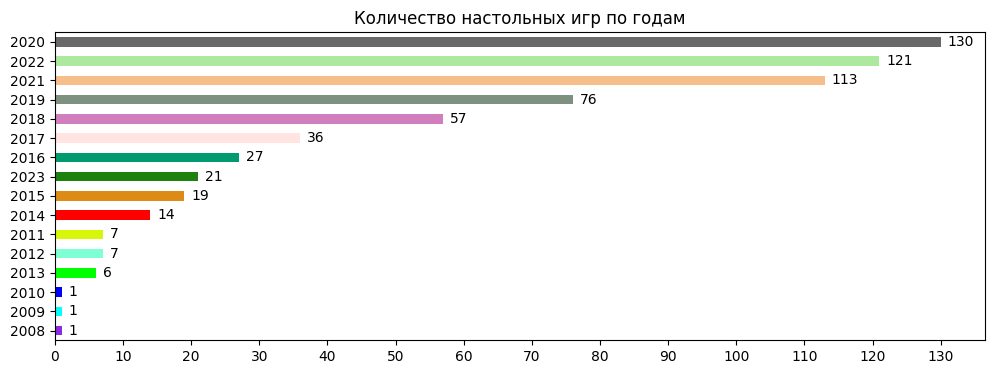

In [114]:
import matplotlib.pyplot as plt

# Создание объекта осей и построение горизонтальной столбчатой диаграммы
sorted_counts = merge_data['Year'].value_counts().sort_values(ascending=True)
ax = sorted_counts.plot(kind='barh', figsize=(12, 4), title="Количество настольных игр по годам", color=colors)

# Определение максимального значения
max_value = sorted_counts.max()

# Настройка делений оси x
plt.xticks(ticks=[i for i in range(0, max_value + 6, 10)])  # Установка делений оси x с интервалом 10

# Добавление ровных значений на график
for i, v in enumerate(sorted_counts):
    ax.text(v + 1, i, str(v), va='center')  # Добавление текста с количеством над каждым столбцом

# Сохранение изображения
plt.savefig('images/year.png')  # Сохранение диаграммы в файл 'year.png' в папке 'images'



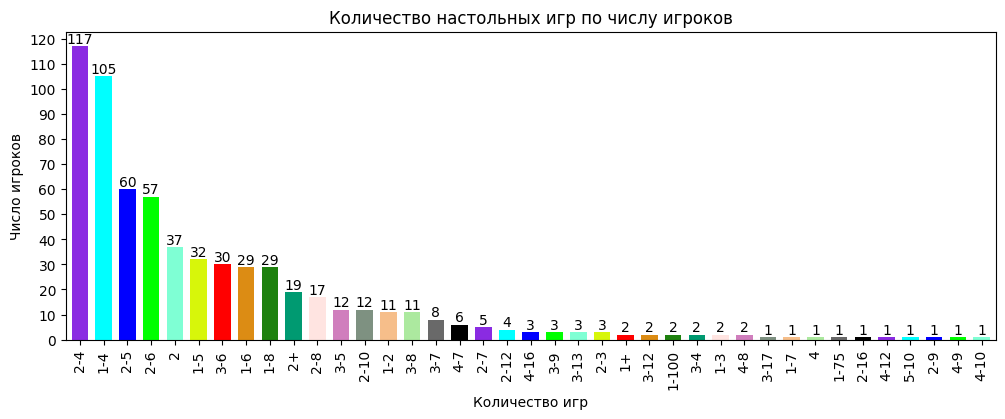

In [115]:
fig, ax = plt.subplots(figsize=(12, 4))
ax = merge_data['Player'].value_counts().plot(kind='bar', width=0.7, color=colors)
max_value = merge_data['Player'].value_counts().max()
plt.yticks(ticks=[i for i in range(0, max_value + 4, 10)])

ax.set_title("Количество настольных игр по числу игроков")
ax.set_xlabel("Количество игр")
ax.set_ylabel("Число игроков")

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.savefig('images/player.png')

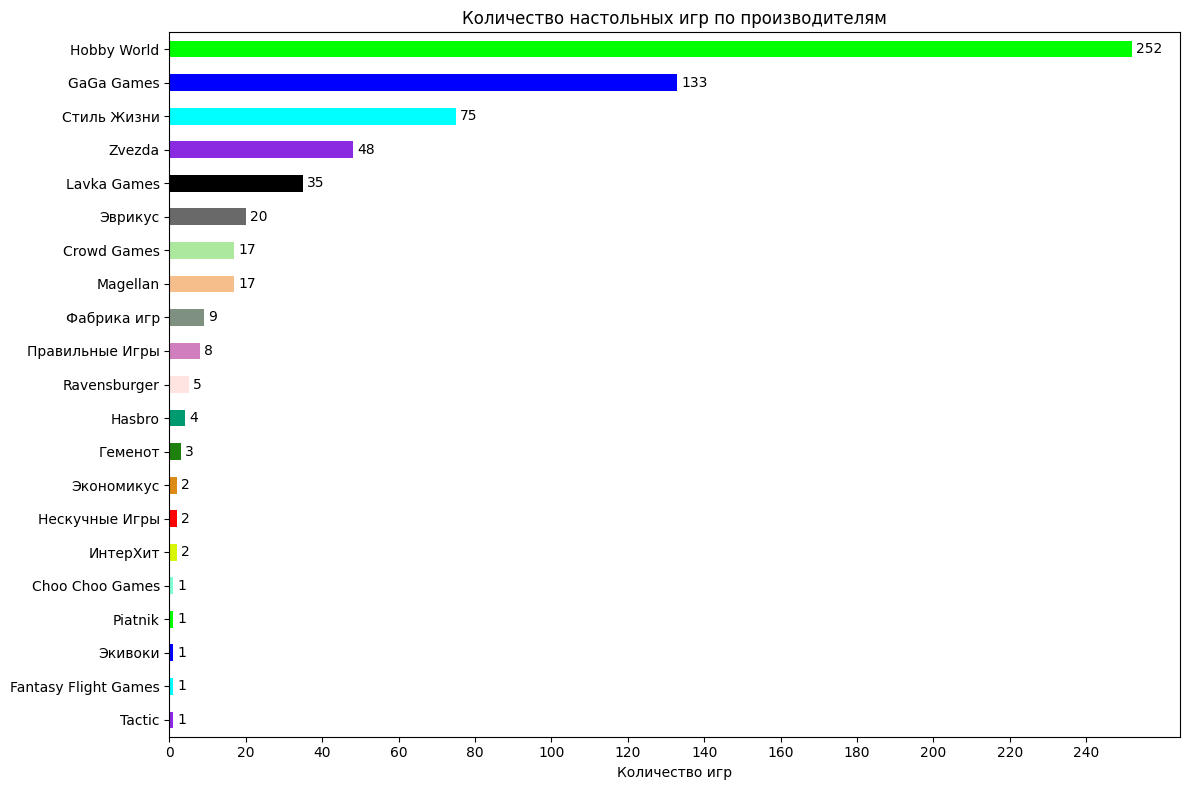

In [116]:
fig, ax = plt.subplots(figsize=(12, 8))
sorted_counts = merge_data['Manufacture'].value_counts().sort_values(ascending=True)
sorted_counts.plot(kind='barh', ax=ax, color=colors)
ax.set_title("Количество настольных игр по производителям")
ax.set_xlabel("Количество игр")

max_value = sorted_counts.max()
plt.xticks(ticks=[i for i in range(0, max_value + 4, 20)])

for p in ax.patches:
    width = p.get_width()
    ax.annotate(str(width), xy=(width, p.get_y() + p.get_height() / 2), xytext=(3, 0),
                textcoords="offset points", ha='left', va='center')

plt.tight_layout()
plt.savefig('images/manufacture.png')

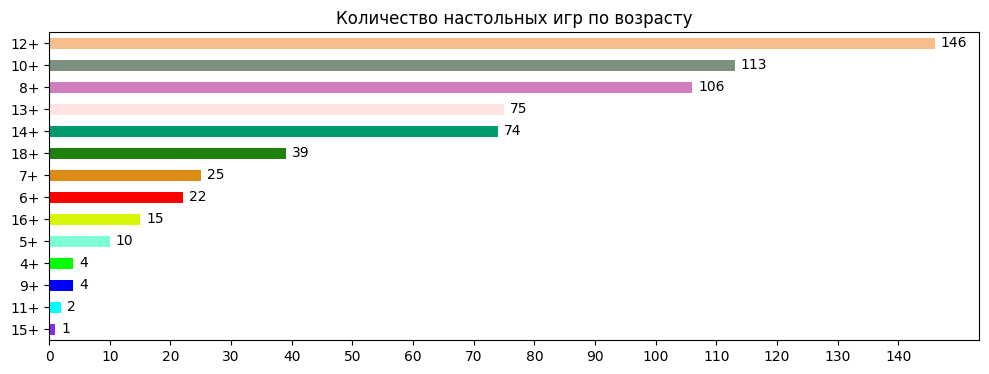

In [117]:

# Создание объекта осей и построение горизонтальной столбчатой диаграммы
sorted_counts = merge_data['Age'].value_counts().sort_values(ascending=True)
ax = sorted_counts.plot(kind='barh', figsize=(12, 4), title="Количество настольных игр по возрасту", color=colors)

# Определение максимального значения
max_value = sorted_counts.max()

# Настройка делений оси x
plt.xticks(ticks=[i for i in range(0, max_value + 4, 10)])

# Добавление аннотаций к столбцам
for i, v in enumerate(sorted_counts):
    ax.text(v + 1, i, str(v), va='center')

# Сохранение изображения
plt.savefig('images/age.png')


In [118]:
# Сортировка объединенных данных по столбцу 'Name_ga'
merge_data = merge_data.sort_values(by=['Name_ga'])

# Создание пустого DataFrame для кнопок
buttons_data = pd.DataFrame()

# Создание DataFrame с уникальными значениями первой буквы в столбце 'Name_ga'
library_buttons = pd.DataFrame(merge_data['Name_ga'].astype(str).str[0].drop_duplicates())

# Создание DataFrame с уникальными значениями в столбце 'Year', отсортированными по убыванию
year_buttons = pd.DataFrame(merge_data['Year'].sort_values(ascending=False).drop_duplicates())

# Создание DataFrame с уникальными значениями в столбце 'Manufacture', отсортированными по убыванию
manufacture_buttons = pd.DataFrame(merge_data['Manufacture'].sort_values(ascending=False).drop_duplicates().sort_values())

# Создание DataFrame с уникальными значениями в столбце 'Age', отсортированными по убыванию
age_buttons = pd.DataFrame(merge_data['Age'].sort_values(ascending=False).drop_duplicates())

# Создание DataFrame с уникальными значениями в столбце 'Player', отсортированными по убыванию
player_buttons = pd.DataFrame(merge_data['Player'].sort_values(ascending=False).drop_duplicates())

# Сброс индексов в DataFrame'ах
library_buttons = library_buttons.reset_index(drop=True)
year_buttons = year_buttons.reset_index(drop=True)
manufacture_buttons = manufacture_buttons.reset_index(drop=True)
age_buttons = age_buttons.reset_index(drop=True)
player_buttons = player_buttons.reset_index(drop=True)

# Транспонирование DataFrame'ов
library_buttons = library_buttons.transpose()
year_buttons = year_buttons.transpose()
manufacture_buttons = manufacture_buttons.transpose()
age_buttons = age_buttons.transpose()
player_buttons = player_buttons.transpose()

# Добавление DataFrame'ов в buttons_data
buttons_data = buttons_data.append(library_buttons)
buttons_data = buttons_data.append(year_buttons)
buttons_data = buttons_data.append(manufacture_buttons)
buttons_data = buttons_data.append(age_buttons)
buttons_data = buttons_data.append(player_buttons)

# Транспонирование buttons_data
buttons_data = buttons_data.transpose()

# Возврат buttons_data
buttons_data


C:\Users\ilyan\AppData\Local\Temp\ipykernel_9652\4162523242.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  buttons_data = buttons_data.append(library_buttons)
C:\Users\ilyan\AppData\Local\Temp\ipykernel_9652\4162523242.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  buttons_data = buttons_data.append(year_buttons)
C:\Users\ilyan\AppData\Local\Temp\ipykernel_9652\4162523242.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  buttons_data = buttons_data.append(manufacture_buttons)
C:\Users\ilyan\AppData\Local\Temp\ipykernel_9652\4162523242.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  buttons_data = buttons_data.append(

,Name_ga,Year,Manufacture,Age,Player
0,5,2023,Choo Choo Games,9+,5-10
1,7,2022,Crowd Games,8+,4-9
2,A,2021,Fantasy Flight Games,7+,4-8
3,B,2020,GaGa Games,6+,4-7
4,C,2019,Hasbro,5+,4-16
5,D,2018,Hobby World,4+,4-12
6,E,2017,Lavka Games,18+,4-10
7,F,2016,Magellan,16+,4
8,L,2015,Piatnik,15+,3-9
9,N,2014,Ravensburger,14+,3-8


In [119]:
# Сохранение buttons_data в CSV файл без индексов
buttons_data.to_csv("buttons.csv", index=False)

In [120]:
# Удаление столбцов ['Transliterated_name', 'Transliterated_name_x', 'Transliterated_name_y', 'Name_HG', 'Name_LI'] из merge_data
merge_data = merge_data.drop(columns=['Transliterated_name', 'Transliterated_name_x', 'Transliterated_name_y', 'Name_HG', 'Name_LI'])

# Переименование столбца 'Name_ga' в ' Name' в merge_data (без присвоения результата)
merge_data.rename(columns={'Name_ga': ' Name'})

# Сохранение merge_data в CSV файл без индексов
merge_data.to_csv("merged_data_parsers.csv", index=False)